# <center> *** SCOPE AND WORKLOAD OF THE TICKETS BY MONTHLY/DAILY/HOURLY ***</center>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('C:\\Users\\MaheshAlleswaram\\Desktop\\ticket.xlsx')

In [3]:
df.head()

,TICKETID,OPEN,ASSIGNDATE,RESOLVE,CLOSE,RESOLVERGROUP,RESOLVER,DESCRIPTION,INTERNALPRIORITY,STATUS,...,ASSETNUM,CINUM,CLASS,DURATION,NORMALIZED_SLA_TIME,SLA,NUMBER_HOPS,INVOLVED_GROUPS,groups,repeat hops
0,SR61876354,2019-05-01 00:10:57,2019-05-01 00:12:29,2019-05-01 04:33:09,2019-05-06 13:13:29,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,T_EBOND@HLAG.COM,VOIP - chrismi - Change User,3,CLOSED,...,NaN,PBUE2548,SR,15731.0,469.0,IN,1,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,1,0
1,IN62701632,2019-05-01 00:13:47,2019-05-01 00:14:00,2019-05-01 04:33:09,2019-05-06 13:13:29,I-EUS-DE-CSC-SDK-HLCFRONTDESK,T_EBOND@HLAG.COM,VOIP - chrismi - Change User,2,CLOSED,...,NaN,PBUE2548,INCIDENT,15562.0,300.0,IN,2,"C-HLC-WW-X-SITA-CHANGE, I-EUS-DE-CSC-SDK-HLCFR...",2,0
2,SR61876355,2019-05-01 00:15:57,2019-05-01 00:16:53,2019-05-01 04:52:28,2019-05-06 13:09:41,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,T_EBOND@HLAG.COM,VOIP - yangkh - Change User,3,CLOSED,...,NaN,PSEL1624,SR,16590.0,967.0,IN,1,I-EUS-DE-CSC-SDK-HLCFRONTDESK3,1,0
3,IN62701633,2019-05-01 00:16:36,2019-05-01 00:16:36,2019-05-01 06:36:33,2019-05-02 11:03:21,I-SSO-US-SMD-INT-WINTEL-HLU,GSMAE6XA@DE.IBM.COM,hlc#khlubu01#An entry in EventLog occured: The...,2,CLOSED,...,NaN,NaN,INCIDENT,22797.0,22797.0,IN,1,I-SSO-US-SMD-INT-WINTEL-HLU,1,0
4,IN62701634,2019-05-01 00:17:45,2019-05-01 00:17:58,2019-05-01 04:52:28,2019-05-06 13:09:41,I-EUS-DE-CSC-SDK-HLCFRONTDESK,T_EBOND@HLAG.COM,VOIP - yangkh - Change User,2,CLOSED,...,NaN,PSEL1624,INCIDENT,16482.0,859.0,IN,2,"C-HLC-WW-X-SITA-CHANGE, I-EUS-DE-CSC-SDK-HLCFR...",2,0


##  Analyzing the data and data wrangling

In [4]:
df.shape

(68177, 23)

In [5]:
df.tail()

,TICKETID,OPEN,ASSIGNDATE,RESOLVE,CLOSE,RESOLVERGROUP,RESOLVER,DESCRIPTION,INTERNALPRIORITY,STATUS,...,ASSETNUM,CINUM,CLASS,DURATION,NORMALIZED_SLA_TIME,SLA,NUMBER_HOPS,INVOLVED_GROUPS,groups,repeat hops
68172,IN62752100,2019-08-31 23:20:19,2019-08-31 23:20:33,2019-09-02 13:53:03,2019-09-02 13:53:19,I-EUS-DE-CSC-SDK-HLCFRONTDESK,ROY-CHARLES.STODOLLIK1@DE.IBM.COM,XC20T078 ERROR !AOQLIK !sev=1!LABEL:XC20T078 A...,1,CLOSED,...,NaN,NaN,INCIDENT,138763.0,10786.0,IN,4,"I-EUS-DE-CSC-SDK-HLCFRONTDESK, I-EUS-DE-CSC-SD...",3,1
68173,IN62752101,2019-08-31 23:42:58,2019-08-31 23:42:58,NaT,NaT,NaN,NaN,hlc#hlcptsmfra011s1#hll101b Backup 2200_001D_A...,2,INPROG,...,NaN,NaN,INCIDENT,NaN,NaN,NaN,1,I-SSO-CZ-STO-BRM-TSMHLC,1,0
68174,IN62752102,2019-08-31 23:42:58,2019-08-31 23:42:58,NaT,NaT,NaN,NaN,hlc#hlcptsmfra011s1#hll101b Backup 2200_001D_A...,2,INPROG,...,NaN,NaN,INCIDENT,NaN,NaN,NaN,1,I-SSO-CZ-STO-BRM-TSMHLC,1,0
68175,IN62752103,2019-08-31 23:42:58,2019-08-31 23:42:58,2019-09-03 09:20:05,2019-09-04 10:29:35,I-SSO-CZ-STO-BRM-TSMHLC,ROSTISLAV_VORAC@CZ.IBM.COM,hlc#hlcptsmfra011s1#hll101b Backup 2100_001D_A...,3,CLOSED,...,NaN,NaN,INCIDENT,207426.0,207426.0,OUT,1,I-SSO-CZ-STO-BRM-TSMHLC,1,0
68176,IN62752104,2019-08-31 23:53:12,2019-08-31 23:53:12,NaT,NaT,NaN,NaN,hlc#hlcptsmfra021s2#hll102b Backup 2200_001D_A...,2,INPROG,...,NaN,NaN,INCIDENT,NaN,NaN,NaN,2,"I-SSO-CZ-STO-BRM-TSMHLC, I-SSO-CZ-STO-BRM-TSMSHD",2,0


In [6]:
df.columns

Index(['TICKETID', 'OPEN', 'ASSIGNDATE', 'RESOLVE', 'CLOSE', 'RESOLVERGROUP',
       'RESOLVER', 'DESCRIPTION', 'INTERNALPRIORITY', 'STATUS', 'SOLUTION',
       'SERVICES', 'SERVICEGROUP', 'ASSETNUM', 'CINUM', 'CLASS', 'DURATION',
       'NORMALIZED_SLA_TIME', 'SLA', 'NUMBER_HOPS', 'INVOLVED_GROUPS',
       'groups', 'repeat hops'],
      dtype='object')

In [7]:
data=df[['TICKETID','OPEN']]

In [8]:
data.head()

,TICKETID,OPEN
0,SR61876354,2019-05-01 00:10:57
1,IN62701632,2019-05-01 00:13:47
2,SR61876355,2019-05-01 00:15:57
3,IN62701633,2019-05-01 00:16:36
4,IN62701634,2019-05-01 00:17:45


In [9]:
data.isnull().sum()

TICKETID    0
OPEN        0
dtype: int64

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
data['OPEN']=data['OPEN'].astype(str)

c:\users\maheshalleswaram\documents\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_SR=data[data['TICKETID'].str.contains('SR')]

In [13]:
data_IN=data[data['TICKETID'].str.contains('IN')]

In [14]:
data_SR.shape

(21588, 2)

In [15]:
data_IN.shape

(46541, 2)

In [16]:
data_SR.head()

,TICKETID,OPEN
0,SR61876354,2019-05-01 00:10:57
2,SR61876355,2019-05-01 00:15:57
6,SR61876356,2019-05-01 00:20:33
9,SR61876357,2019-05-01 00:24:44
11,SR61876358,2019-05-01 00:36:46


In [17]:
df_SR=data_SR['OPEN']

In [18]:
data_IN.head()

,TICKETID,OPEN
1,IN62701632,2019-05-01 00:13:47
3,IN62701633,2019-05-01 00:16:36
4,IN62701634,2019-05-01 00:17:45
5,IN62701635,2019-05-01 00:18:37
7,IN62701636,2019-05-01 00:22:22


In [19]:
data_IN.tail()

,TICKETID,OPEN
68172,IN62752100,2019-08-31 23:20:19
68173,IN62752101,2019-08-31 23:42:58
68174,IN62752102,2019-08-31 23:42:58
68175,IN62752103,2019-08-31 23:42:58
68176,IN62752104,2019-08-31 23:53:12


In [20]:
df_IN=data_IN['OPEN']

In [21]:
df_IN=pd.DataFrame(df_IN)

In [22]:
df_IN.shape

(46541, 1)

In [23]:
df_IN['Year']=df_IN.OPEN.str[0:4]

In [24]:
df_IN['Month']=df_IN.OPEN.str[5:7]
df_IN['Month'].head()

1    05
3    05
4    05
5    05
7    05
Name: Month, dtype: object

In [25]:
df_IN['Day']=df_IN.OPEN.str[8:10]

In [26]:
df_IN['Hours']=df_IN.OPEN.str[11:13]

In [27]:
df_IN.head()

,OPEN,Year,Month,Day,Hours
1,2019-05-01 00:13:47,2019,05,01,00
3,2019-05-01 00:16:36,2019,05,01,00
4,2019-05-01 00:17:45,2019,05,01,00
5,2019-05-01 00:18:37,2019,05,01,00
7,2019-05-01 00:22:22,2019,05,01,00


In [28]:
dframe_IN=df_IN[['Year','Month','Day','Hours']]

In [29]:
dframe_IN=dframe_IN.reset_index(drop=True)

In [30]:
df_IN['Hours'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [31]:
dframe_IN.shape

(46541, 4)

In [32]:
dframe_IN.tail()

,Year,Month,Day,Hours
46536,2019,08,31,23
46537,2019,08,31,23
46538,2019,08,31,23
46539,2019,08,31,23
46540,2019,08,31,23


In [33]:
dframe_IN['Year'].unique()

array(['2019'], dtype=object)

In [34]:
dframe_IN['Month'].unique()

array(['05', '06', '07', '08'], dtype=object)

In [35]:
dframe_IN['Day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

# Plotting Incident Report

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

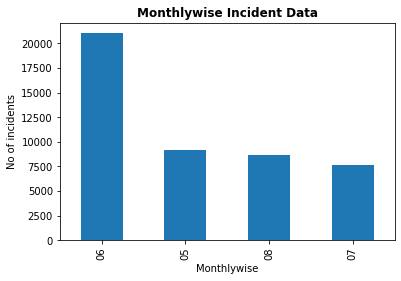

In [37]:
pd.value_counts(dframe_IN['Month']).plot.bar()
plt.title('Monthlywise Incident Data',fontweight="bold")
plt.xlabel('Monthlywise')
plt.ylabel('No of incidents')
plt.show()

In [38]:
labels=dframe_IN['Month'].unique()

In [39]:
mcount=pd.value_counts(dframe_IN['Month']).sort_index()

In [40]:
mcount=pd.DataFrame(mcount)

In [41]:
mcount

,Month
05,9174
06,21041
07,7686
08,8640


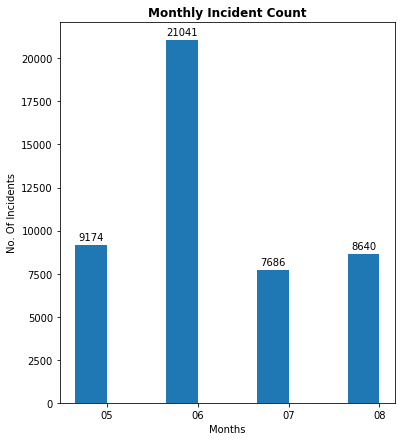

In [42]:
x = np.arange(len(labels))  
width=0.35
fig, ax = plt.subplots(figsize=(6,7))
cal = plt.bar(x-width/2, mcount['Month'],width)

ax.set_ylabel('No. Of Incidents')
ax.set_title('Monthly Incident Count',fontweight="bold")
ax.set_xlabel('Months')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(cal)

plt.show()

# Daily Incident Count

In [43]:
labels=dframe_IN['Day'].unique()
labels

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [44]:
icount=pd.value_counts(dframe_IN['Day']).sort_index()

In [45]:
icount=pd.DataFrame(icount)

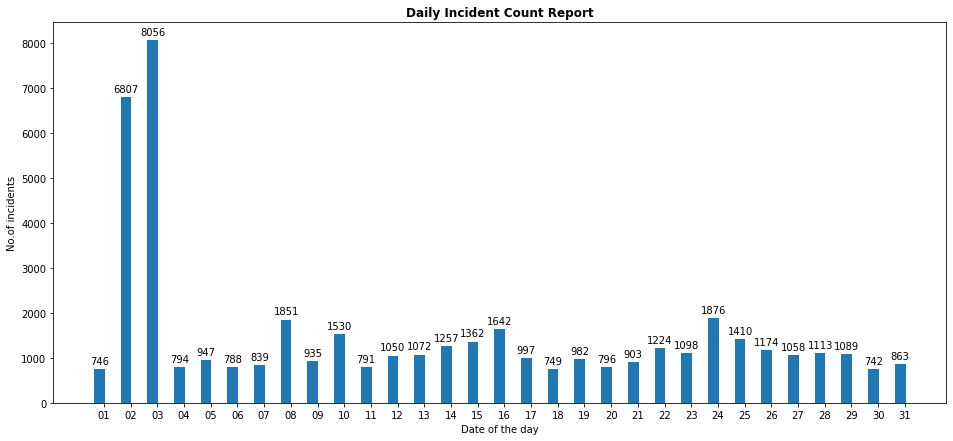

In [46]:
x=np.arange(len(labels))

fig,ax=plt.subplots(figsize=(16,7))
dcal=plt.bar(x-width/2,icount['Day'],width=0.40)

ax.set_xlabel('Date of the day')
ax.set_ylabel('No.of incidents')
ax.set_title('Daily Incident Count Report',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(dcal)
plt.show()

# Hourly Incident Count

In [47]:
labels=dframe_IN['Hours'].unique()

In [48]:
labels

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [49]:
hcount=pd.value_counts(dframe_IN['Hours']).sort_index()

In [50]:
hcount=pd.DataFrame(hcount)

In [51]:
tot=hcount.sum()
tot

Hours    46541
dtype: int64

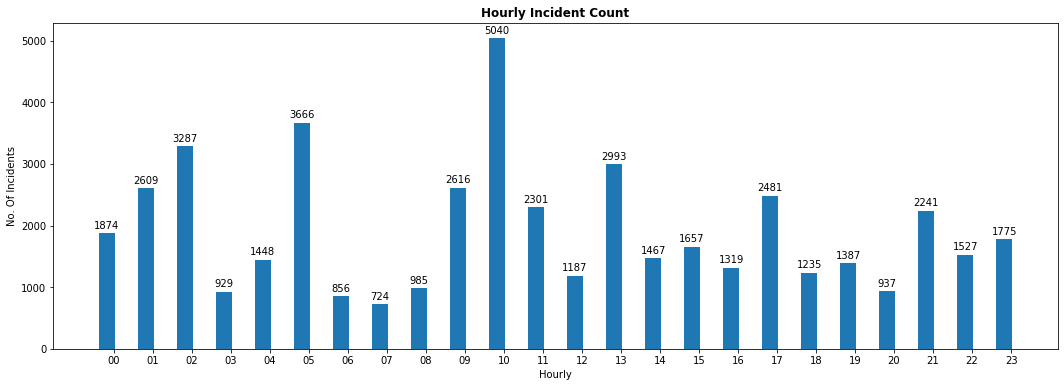

In [52]:
x=np.arange(len(labels))

fig, ax=plt.subplots(figsize=(18,6))
hcal=plt.bar(x-width/2,hcount['Hours'],width=0.40)

ax.set_xlabel('Hourly')
ax.set_ylabel('No. Of Incidents')
ax.set_title('Hourly Incident Count',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(hcal)

plt.show()

# Calculation of Service Requests (SR) 

In [53]:
data_SR.head()

,TICKETID,OPEN
0,SR61876354,2019-05-01 00:10:57
2,SR61876355,2019-05-01 00:15:57
6,SR61876356,2019-05-01 00:20:33
9,SR61876357,2019-05-01 00:24:44
11,SR61876358,2019-05-01 00:36:46


In [54]:
data_SR.shape

(21588, 2)

In [55]:
data.tail()

,TICKETID,OPEN
68172,IN62752100,2019-08-31 23:20:19
68173,IN62752101,2019-08-31 23:42:58
68174,IN62752102,2019-08-31 23:42:58
68175,IN62752103,2019-08-31 23:42:58
68176,IN62752104,2019-08-31 23:53:12


In [56]:
df_SR=data_SR['OPEN']

In [57]:
df_SR=pd.DataFrame(df_SR)

In [58]:
df_SR['Year']=df_SR.OPEN.str[0:4]

In [59]:
df_SR['Year'].head()

0     2019
2     2019
6     2019
9     2019
11    2019
Name: Year, dtype: object

In [60]:
df_SR['Month']=df_SR.OPEN.str[5:7]

In [61]:
df_SR['Month'].head()

0     05
2     05
6     05
9     05
11    05
Name: Month, dtype: object

In [62]:
df_SR['Day']=df_SR.OPEN.str[8:10]

In [63]:
df_SR['Hours']=df_SR.OPEN.str[11:13]

In [64]:
df_SR['Day'].head()

0     01
2     01
6     01
9     01
11    01
Name: Day, dtype: object

In [65]:
df_SR.head()

,OPEN,Year,Month,Day,Hours
0,2019-05-01 00:10:57,2019,05,01,00
2,2019-05-01 00:15:57,2019,05,01,00
6,2019-05-01 00:20:33,2019,05,01,00
9,2019-05-01 00:24:44,2019,05,01,00
11,2019-05-01 00:36:46,2019,05,01,00


In [66]:
dframe_SR=df_SR[['Year','Month','Day','Hours']]

In [67]:
dframe_SR.head()

,Year,Month,Day,Hours
0,2019,05,01,00
2,2019,05,01,00
6,2019,05,01,00
9,2019,05,01,00
11,2019,05,01,00


In [68]:
dframe_SR=dframe_SR.reset_index(drop=True)

In [69]:
dframe_SR.head()

,Year,Month,Day,Hours
0,2019,05,01,00
1,2019,05,01,00
2,2019,05,01,00
3,2019,05,01,00
4,2019,05,01,00


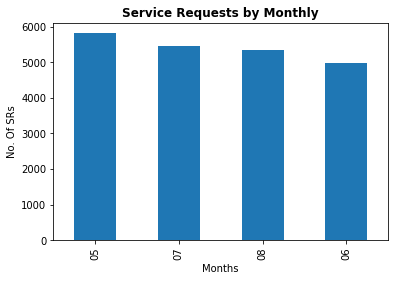

In [70]:
pd.value_counts(dframe_SR['Month']).plot.bar()
plt.title('Service Requests by Monthly',fontweight="bold")
plt.xlabel('Months')
plt.ylabel('No. Of SRs')
plt.show()

In [71]:
labels=dframe_SR['Month'].unique()
labels

array(['05', '06', '07', '08'], dtype=object)

In [72]:
mcount=pd.value_counts(dframe_SR['Month']).sort_index()

In [73]:
mcount

05    5817
06    4967
07    5460
08    5344
Name: Month, dtype: int64

In [74]:
mcount=pd.DataFrame(mcount)

## Plotting Service requests by monthly

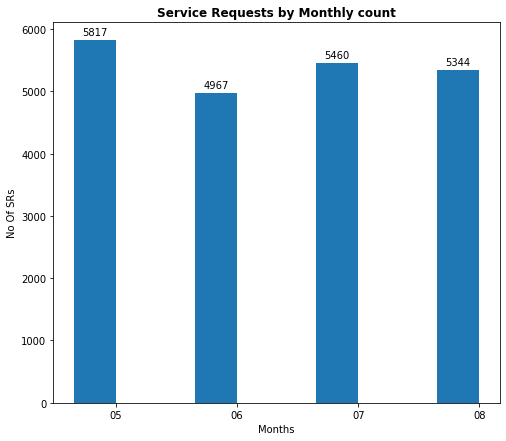

In [75]:
x=np.arange(len(labels))

fig,ax=plt.subplots(figsize=(8,7))
scal=plt.bar(x-width/2,mcount['Month'],width=0.35)

ax.set_xlabel('Months')
ax.set_ylabel('No Of SRs')
ax.set_title('Service Requests by Monthly count',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(scal)

plt.show()

# Service Request count by Daily

In [76]:
labels=dframe_SR['Day'].unique()
labels

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [77]:
dcount=pd.value_counts(dframe_SR['Day']).sort_index()

In [78]:
dcount=pd.DataFrame(dcount)

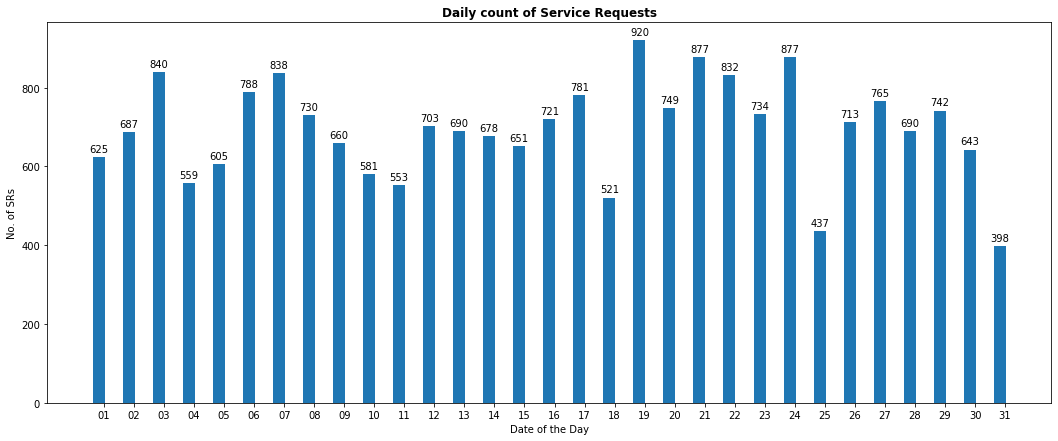

In [79]:
x=np.arange(len(labels))

fig,ax = plt.subplots(figsize=(18,7))
dcal=plt.bar(x-width/2,dcount['Day'],width=0.40)

ax.set_xlabel('Date of the Day')
ax.set_ylabel('No. of SRs')
ax.set_title('Daily count of Service Requests',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(dcal)

plt.show()

# Hourly Service Request (SR) count

In [80]:
labels=dframe_SR['Hours'].unique()

In [81]:
labels

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [82]:
hrcount=pd.value_counts(dframe_SR['Hours']).sort_index()

In [83]:
hrcount=pd.DataFrame(hrcount)

In [84]:
hrcount.head()

,Hours
00,425
01,424
02,475
03,564
04,496


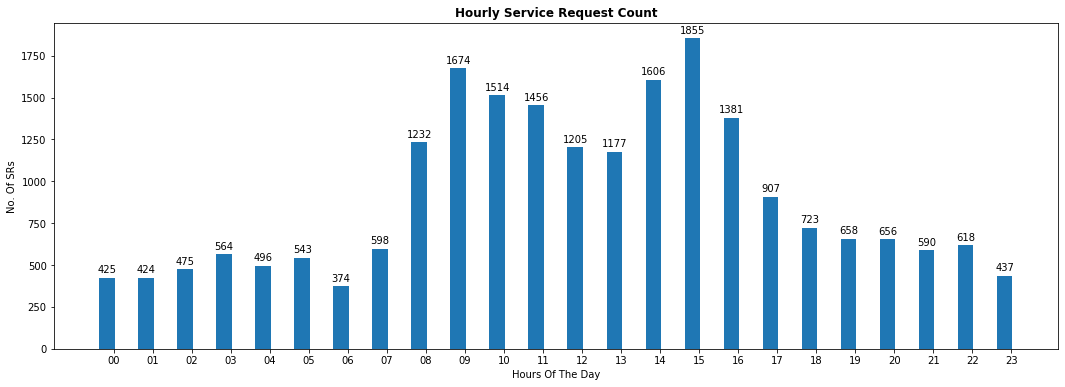

In [85]:
x=np.arange(len(labels))

fig, ax=plt.subplots(figsize=(18,6))
hrcal=plt.bar(x-width/2,hrcount['Hours'],width=0.40)

ax.set_xlabel('Hours Of The Day')
ax.set_ylabel('No. Of SRs')
ax.set_title('Hourly Service Request Count',fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(hrcal)

plt.show()

### Conclusion :

As per hourly service request report, the Workload is high from 8:00 AM to 17:00 PM.